# Logistic Regression

## Background


## Multiple Variable Models

$$Y_{obs} = \frac{e^{\bf{\beta}^TX}}{1 + e^{\bf{\beta}^TX}} + \epsilon$$<br>

<!--$Y_{mod} = \frac{e^{\bf{\beta}^TX}}{1 + e^{\bf{\beta}^TX}}$<br>-->

where

$$
\begin{gather}
\mathbf{\beta}=
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_m \\
\end{pmatrix}
\end{gather}
$$


$$
\begin{gather}
\mathbf{X}=
\begin{pmatrix}
1 & x_{1,1} & x_{1,2}&\dots & x_{1,m}\\
1 & x_{2,1} & x_{2,2}&\dots & x_{2,m}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1 & x_{n,1} & x_{n,2}&\dots & x_{n,m}\\
\end{pmatrix}
\end{gather}
$$

The matrix has as many rows as observations to fit, and as many columns as predictor variables.

### Fitting Process

The logistic regression method attempts to find values of $\beta$ that minimizes the log-likelihood function

$$log_e L(\beta) = Y_{obs}^T \cdot (\beta^TX) - log_e \bf{1}^T \cdot (1 + e^{{\beta}^TX})$$

The presence of the last term makes the process a search process (instead of a single equation to solve), some form of iterative least squares.  In general we will rely on packages to handle this work - an example follows



Read the database

In [114]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mydatabase = pd.read_csv('LogisticRegressionHomebrewExample.csv')

Verify the read, and plot the database

In [21]:
mydatabase.describe()

X1            X2         Class
count  20000.000000  20000.000000  20000.000000
mean       0.496920      2.001764      0.500000
std        1.113666      2.240266      0.500013
min       -4.214002     -3.489115      0.000000
25%       -0.260873     -0.015846      0.000000
50%        0.498444      1.978725      0.500000
75%        1.264066      4.016432      1.000000
max        4.605613      7.945987      1.000000

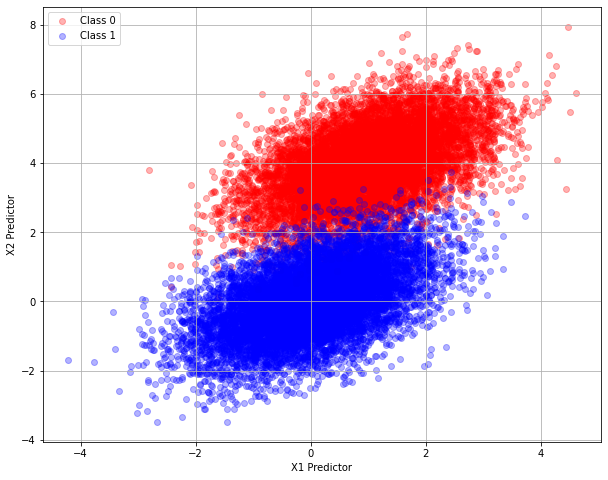

In [36]:
#Split dataframe based on class value and plot
classone = mydatabase[mydatabase['Class']<1.0]
classzero = mydatabase[mydatabase['Class']>0.0]
# plot the two classes as red and blue
plt.figure(figsize=(10, 8))
plt.scatter(classzero['X1'],classzero['X2'], c="red", alpha=0.3)
plt.scatter(classone['X1'],classone['X2'], c="blue", alpha=0.3)
plt.legend(["Class 0","Class 1"])
plt.xlabel('X1 Predictor') 
plt.ylabel('X2 Predictor') 
plt.grid(which='both')
plt.show()

The two classes appear different enough so the logistic-regression classification seems possible.  For example if the predictor input is $[0,0]$ then the class is likely "Class 1", whereas if the predictor input is $[0,4]$ then the class is likely "Class 0" according to the above plot.

In [111]:
#split dataset in features and target variable
feature_cols = ['X1', 'X2']
X = mydatabase[feature_cols] # Features
y = mydatabase["Class"] # Target variable

In [112]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [113]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#logreg = LogisticRegression()
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [115]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred, y_test)
cnf_matrix

array([[2435,   58],
       [  42, 2465]])

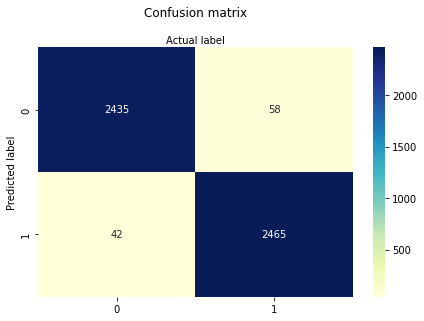

In [117]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label');

Now lets build a classification (class prediction) engine using logistic regression results.  

First we need the sigmoid response function where 

$$sigmoid(X,\beta) = 1 + e^{{\beta}^TX} $$

In [118]:
def sigmoid(scores): # scores = b0+b1X1+b2X2+... where b0,b1,b2,... are specified
    return 1/(1+np.exp(-scores))

Now lets use our two obvious values from the discussion above

In [162]:
inputs = np.array([[0],[1]]) # one example input, should evaluate as
scores = np.dot(logreg.coef_,inputs) + logreg.intercept_
estimated_class = sigmoid(np.dot(logreg.coef_,inputs) + logreg.intercept_)[0,0] # grab the only element
print("X1 Input = ",inputs[0][0],"\nX2 Input = ",inputs[1][0],"\nEstimated Class Value",round(estimated_class,0))

X1 Input =  0 
X2 Input =  1 
Estimated Class Value 0.0


In [163]:
inputs = np.array([[0],[4]]) # one example input, should evaluate as
scores = np.dot(logreg.coef_,inputs) + logreg.intercept_
estimated_class = sigmoid(np.dot(logreg.coef_,inputs) + logreg.intercept_)[0,0] # grab the only element
print("X1 Input = ",inputs[0][0],"\nX2 Input = ",inputs[1][0],"\nEstimated Class Value",round(estimated_class,0))

X1 Input =  0 
X2 Input =  4 
Estimated Class Value 1.0


So now we have a classifer function, we could probably draw a dividing line back on the original plot and identify the dividing line,  we only need two points where the classifier returns a value of 0.5 as below

In [171]:
inputs = np.array([[-4],[0.645]]) # one example input, should evaluate as
scores = np.dot(logreg.coef_,inputs) + logreg.intercept_
estimated_class = sigmoid(np.dot(logreg.coef_,inputs) + logreg.intercept_)[0,0] # grab the only element
print("X1 Input = ",inputs[0][0],"\nX2 Input = ",inputs[1][0],"\nEstimated Class Value",round(estimated_class,3))

X1 Input =  -4.0 
X2 Input =  0.645 
Estimated Class Value 0.502


In [188]:
inputs = np.array([[4],[3.018]]) # one example input, should evaluate as
scores = np.dot(logreg.coef_,inputs) + logreg.intercept_
estimated_class = sigmoid(np.dot(logreg.coef_,inputs) + logreg.intercept_)[0,0] # grab the only element
print("X1 Input = ",inputs[0][0],"\nX2 Input = ",inputs[1][0],"\nEstimated Class Value",round(estimated_class,3))

X1 Input =  4.0 
X2 Input =  3.018 
Estimated Class Value 0.5


Our two points by trial and error are: $[-4.0,0.645]$ and $[4.0,3.018]$  we can add this line to our plot


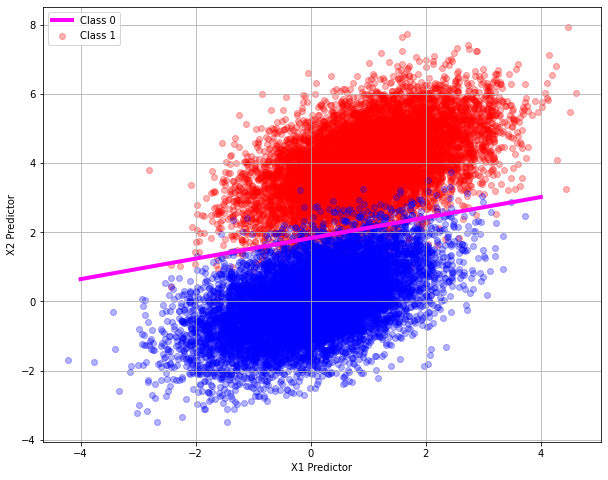

In [192]:
# plot the two classes as red and blue
plt.figure(figsize=(10, 8))
plt.scatter(classzero['X1'],classzero['X2'], c="red", alpha=0.3)
plt.scatter(classone['X1'],classone['X2'], c="blue", alpha=0.3)
plt.plot([-4,4],[0.645,3.018],c="magenta",linewidth=4)
plt.legend(["Class 0","Class 1"])
plt.xlabel('X1 Predictor') 
plt.ylabel('X2 Predictor') 
plt.grid(which='both')
plt.show()

## Single Variable Models

A single variable model is a special case of the multi-variate approach with the following modifications:

$$
\begin{gather}
\mathbf{\beta}=
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\end{pmatrix}
\end{gather}
$$


$$
\begin{gather}
\mathbf{X}=
\begin{pmatrix}
1 & x_{1,1} \\
1 & x_{2,1} \\
\vdots & \vdots \\
1 & x_{n,1} \\
\end{pmatrix}
\end{gather}
$$

A simple example follows:


In [207]:
toxicity = pd.DataFrame([[1,2,3,4,5,6],[28,53,93,126,172,197]],["Log_Dose","Deaths"] )
toxicity = toxicity.transpose()
toxicity.head()
# compute death fraction, all doses exposed to 250 subjects
toxicity["Fraction"]=toxicity["Deaths"]/250.0
# declare lethal id fraction >0.5

def islethal(value):
    if value >= 0.5:
        islethal = 1
    else:
        islethal = 0
    return(islethal)

toxicity["Class"]=toxicity["Fraction"].apply(islethal)
toxicity.head()

Log_Dose  Deaths  Fraction  Class
0         1      28     0.112      0
1         2      53     0.212      0
2         3      93     0.372      0
3         4     126     0.504      1
4         5     172     0.688      1

Log_Dose  Deaths  Fraction  Class
0         1      28     0.112    NaN
1         2      53     0.212    NaN
2         3      93     0.372    NaN
3         4     126     0.504    4.0
4         5     172     0.688    5.0

In [41]:
def log_likelihood(features, target, weights): # features are the design variables; weights are the b0,b1,b2,...;target is the known class (0 or 1)
    scores = np.dot(features, weights)  
    ll = np.sum(target * scores - np.log(1 + np.exp(scores)))  
    return ll

In [99]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept=False, verbose=True, exit_tolerance = 1.0e-9):
    if add_intercept: 
        intercept = np.ones((features.shape[0], 1))  
        features = np.hstack((intercept, features))     
# print statements are for debugging        
    weights = np.zeros(features.shape[1])  # not sure about this line
    print("initial weights = ",weights)
    print("initial log likelihood = ",log_likelihood(features, target, weights))
    
#          
    for step in range(num_steps): 
        llold = log_likelihood(features, target, weights)
        if verbose: print("start weights = ",weights) 
        scores = np.dot(features, weights) 
        if verbose: print("start scores = ",scores)
        predictions = sigmoid(scores)  
        if verbose: print("predictions = ",predictions)
        output_error_signal = target - predictions      
        gradient = np.dot(features.T, output_error_signal)    
        weights = weights + learning_rate * gradient 
        if verbose: print("new weights = ",weights)
        newscores = np.dot(features, weights) 
        if verbose: print("new scores = ",newscores)
        llnew = log_likelihood(features, target, weights)

# test for exit
        if abs(llnew-llold) <= exit_tolerance:
            print("Exit Tolerance Satisfied \n  LL is not changing")
            print("step = ",step) 
            print("ll = ",log_likelihood(features, target, weights))
            break # exit the loop
        if step % 5 == 0:      
            if verbose: print("step = ",step) 
            if verbose: print("ll = ",log_likelihood(features, target, weights))
            if verbose: print("error signal = ",output_error_signal)
            if verbose: print("predictions = ",predictions)
# print on exit
    print("step = ",step) 
    print("ll = ",log_likelihood(features, target, weights))
    print("error signal = ",output_error_signal)
    print("predictions = ",predictions)
    return weights

Produce a design matrix using numpy and the dataframe we read.  Similarily the class vector (of 0's and 1's) is constructed from the dataframe.  These new objects have row-wise correspondence; that is a row of `designmatrix` corresponds to the same row of `classvector`.  In terms of the above expressions

$$\text{classvector} = Y_{obs} $$<br>

$$\text{designmatrix} = X$$<br>


In [96]:
designmatrix = mydatabase[["X1","X2"]].to_numpy()
classvector = mydatabase["Class"].to_numpy()


These are supplied to our regression machine


In [107]:
betas = logistic_regression(designmatrix, classvector, 900, 0.00001, add_intercept=False, verbose=False)

initial weights =  [0. 0.]
initial log likelihood =  -13862.943611198905
Exit Tolerance Satisfied 
  LL is not changing
step =  621
ll =  -8139.368262867247
step =  621
ll =  -8139.368262867247
error signal =  [-0.4258073  -0.69253714 -0.32390763 ...  0.04174041  0.01879931
  0.0332575 ]
predictions =  [0.4258073  0.69253714 0.32390763 ... 0.95825959 0.98120069 0.9667425 ]


In [92]:
modelvector = sigmoid(np.dot(designmatrix, betas))

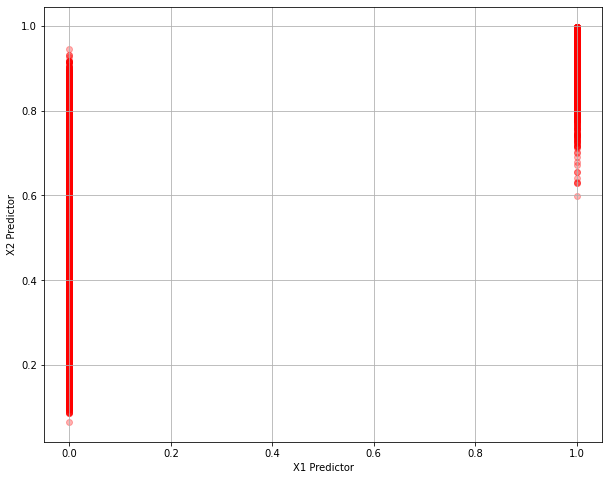

In [79]:
# plot the two classes as red and blue
plt.figure(figsize=(10, 8))
plt.scatter(classvector,modelvector, c="red", alpha=0.3)
#plt.scatter(classone['X1'],classone['X2'], c="blue", alpha=0.3)
#plt.legend(["Class 0","Class 1"])
plt.xlabel('X1 Predictor') 
plt.ylabel('X2 Predictor') 
plt.grid(which='both')
plt.show()

In [88]:
modelvector[1]

0.6925427391802751

In [87]:
classvector[100]

0

In [125]:
sigmoid(np.dot([0,2], betas))

0.8509476740456239

In [109]:
sigmoid(np.dot([0,4], betas))

0.9702321502038639